In [113]:
# 7.1 표 5.12 의 교육비 지출 데이터에 대하여 7.4절의 분석을 수행하여 보아라.
library(ggplot2) # ggplot
library(ggfortify) # autoplot
library(gridExtra)

setwd('D:/Working/03.Korea/회귀분석/report/Chapter6')
p151_data <- read.table("P151.txt", header = TRUE)
p151_data

STATE,Y,X1,X2,X3,Region
ME,61,1704,388,399,1
NH,68,1885,372,598,1
VT,72,1745,397,370,1
MA,72,2394,358,868,1
RI,62,1966,357,899,1
CT,91,2817,362,690,1
NY,104,2685,341,728,1
NJ,99,2521,353,826,1
PA,70,2127,352,656,1
OH,82,2184,387,674,2


In [42]:
summary(p151_reg <- lm(Y ~ X1 + X2 + X3, data = p151_data))


Call:
lm(formula = Y ~ X1 + X2 + X3, data = p151_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.787  -9.202  -2.578  10.590  48.548 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.404627  28.976165  -0.394    0.696    
X1            0.044933   0.007667   5.860 4.69e-07 ***
X2            0.066223   0.048834   1.356    0.182    
X3           -0.028954   0.019293  -1.501    0.140    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.7 on 46 degrees of freedom
Multiple R-squared:  0.4721,	Adjusted R-squared:  0.4376 
F-statistic: 13.71 on 3 and 46 DF,  p-value: 1.608e-06


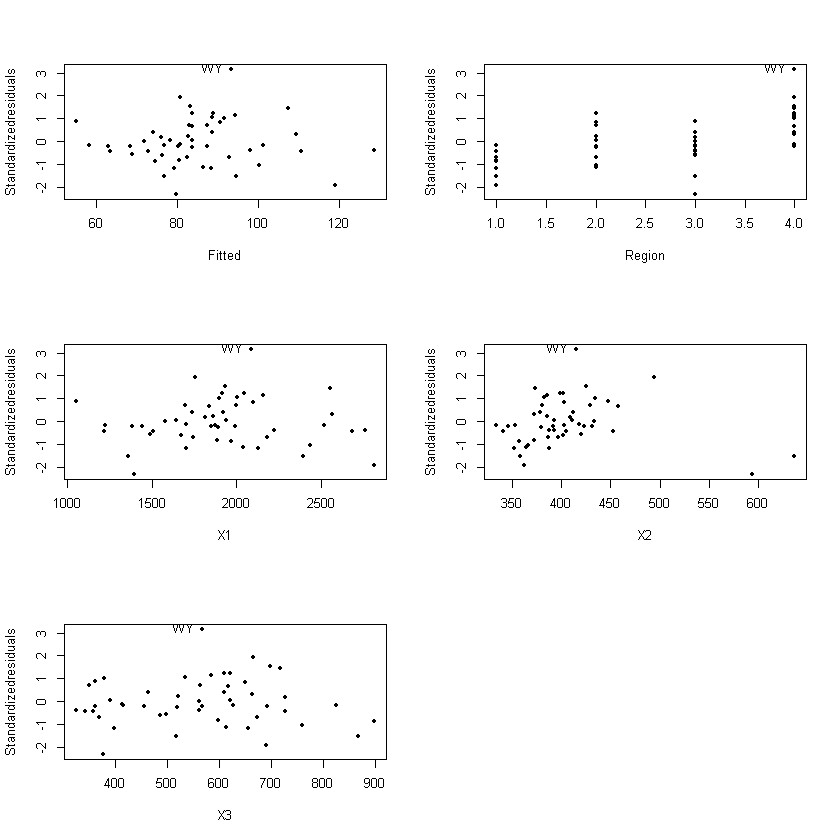

In [80]:
par(mfrow=c(3,2))

index <- which(abs(rstandard(p151_reg)) > 3)[[1]]

plot(fitted(p151_reg),rstandard(p151_reg),pch=20,xlab="Fitted",ylab="Standardizedresiduals")
text(fitted(p151_reg)[index],rstandard(p151_reg)[index],labels=p151_data$STATE[index], pos=2)

plot(p151_data$Region,rstandard(p151_reg),pch=20,xlab="Region",ylab="Standardizedresiduals")
text(p151_data$Region[index],rstandard(p151_reg)[index],labels=p151_data$STATE[index], pos=2)

plot(p151_data$X1,rstandard(p151_reg),pch=20,xlab="X1",ylab="Standardizedresiduals")
text(p151_data$X1[index],rstandard(p151_reg)[index],labels=p151_data$STATE[index], pos=2)

plot(p151_data$X2,rstandard(p151_reg),pch=20,xlab="X2",ylab="Standardizedresiduals")
text(p151_data$X2[index],rstandard(p151_reg)[index],labels=p151_data$STATE[index], pos=2)

plot(p151_data$X3,rstandard(p151_reg),pch=20,xlab="X3",ylab="Standardizedresiduals")
text(p151_data$X3[index],rstandard(p151_reg)[index],labels=p151_data$STATE[index], pos=2)

In [44]:
p151_data2 <- p151_data[-index,]
summary(p151_reg2 <- lm(Y ~ X1 + X2 + X3, data = p151_data2))


Call:
lm(formula = Y ~ X1 + X2 + X3, data = p151_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.588  -8.762  -2.418  11.601  29.545 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.796075  26.034133  -0.184    0.855    
X1           0.042599   0.006903   6.171 1.74e-07 ***
X2           0.055569   0.043866   1.267    0.212    
X3          -0.026883   0.017299  -1.554    0.127    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.07 on 45 degrees of freedom
Multiple R-squared:  0.5097,	Adjusted R-squared:  0.477 
F-statistic: 15.59 on 3 and 45 DF,  p-value: 4.305e-07


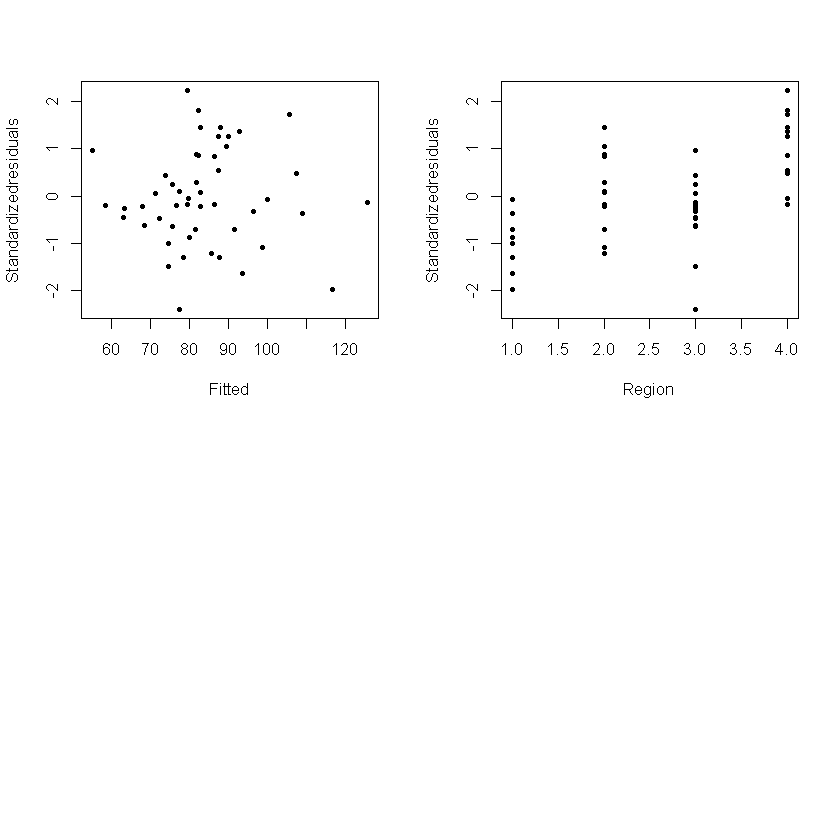

In [77]:
par(mfrow=c(2,2))

plot(fitted(p151_reg2),rstandard(p151_reg2),pch=20,xlab="Fitted",ylab="Standardizedresiduals")
plot(p151_data2$Region,rstandard(p151_reg2),pch=20,xlab="Region",ylab="Standardizedresiduals")

In [55]:
str(p151_data2)
p151_reg2out = cbind(p151_data2, resid(p151_reg2))
w = table(p151_data2$Region)
w

'data.frame':	49 obs. of  6 variables:
 $ STATE : Factor w/ 50 levels "AK","AL","AR",..: 21 30 46 19 39 7 34 31 38 35 ...
 $ Y     : int  61 68 72 72 62 91 104 99 70 82 ...
 $ X1    : int  1704 1885 1745 2394 1966 2817 2685 2521 2127 2184 ...
 $ X2    : int  388 372 397 358 357 362 341 353 352 387 ...
 $ X3    : int  399 598 370 868 899 690 728 826 656 674 ...
 $ Region: int  1 1 1 1 1 1 1 1 1 2 ...



 1  2  3  4 
 9 12 16 12 

In [96]:
resid_str <- 'resid(p151_reg2)'

sig2 = sum(p151_reg2out[,resid_str]^2)/nrow(p151_data2)
sig12 = sum(p151_reg2out[p151_reg2out$Region == 1, resid_str]^2)/(w[1] - 1)
sig22 = sum(p151_reg2out[p151_reg2out$Region == 2, resid_str]^2)/(w[2] - 1)
sig32 = sum(p151_reg2out[p151_reg2out$Region == 3, resid_str]^2)/(w[3] - 1)
sig42 = sum(p151_reg2out[p151_reg2out$Region == 4, resid_str]^2)/(w[4] - 1)

c1 = sqrt(sig12 * dim(p151_data2)[1] / sum(resid(p151_reg2)^2))
c2 = sqrt(sig22 * dim(p151_data2)[1] / sum(resid(p151_reg2)^2))
c3 = sqrt(sig32 * dim(p151_data2)[1] / sum(resid(p151_reg2)^2))
c4 = sqrt(sig42 * dim(p151_data2)[1] / sum(resid(p151_reg2)^2))

wgt = 1 / (c(rep(c1,w[1]),rep(c2,w[2]),rep(c3,w[3]),rep(c4, w[4])))^2

p151_reg3out = cbind(p151_reg2out, wgt)
p151_reg3out

,STATE,Y,X1,X2,X3,Region,resid(p151_reg2),wgt
1,ME,61,1704,388,399,1,-17.6277494,0.6645324
2,NH,68,1885,372,598,1,-12.0993915,0.6645324
3,VT,72,1745,397,370,1,-9.6540529,0.6645324
4,MA,72,2394,358,868,1,-21.7460476,0.6645324
5,RI,62,1966,357,899,1,-12.6246063,0.6645324
6,CT,91,2817,362,690,1,-25.7730034,0.6645324
7,NY,104,2685,341,728,1,-4.9613835,0.6645324
8,NJ,99,2521,353,826,1,-1.0073973,0.6645324
9,PA,70,2127,352,656,1,-17.7378174,0.6645324
10,OH,82,2184,387,674,2,-9.6270137,1.3078299


In [56]:
summary(p151_reg3 <- lm( Y ~ X1 + X2 + X3, data = p151_data2, weights = wgt))


Call:
lm(formula = Y ~ X1 + X2 + X3, data = p151_data2, weights = wgt)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-25.6944  -7.8488  -0.4786  11.4370  25.7995 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.495642  20.082494   0.871   0.3883    
X1           0.040100   0.005538   7.241 4.48e-09 ***
X2           0.008260   0.032936   0.251   0.8031    
X3          -0.026534   0.015160  -1.750   0.0869 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.07 on 45 degrees of freedom
Multiple R-squared:  0.6058,	Adjusted R-squared:  0.5795 
F-statistic: 23.05 on 3 and 45 DF,  p-value: 3.446e-09


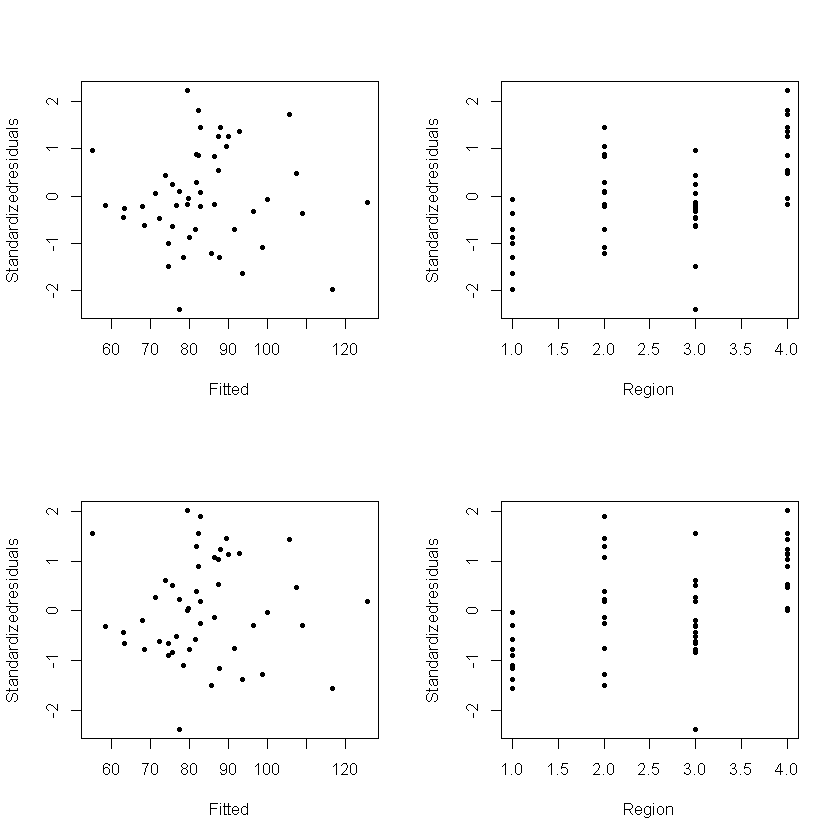

In [79]:
par(mfrow=c(2,2))

plot(fitted(p151_reg2),rstandard(p151_reg2),pch=20,xlab="Fitted",ylab="Standardizedresiduals")
plot(p151_data2$Region,rstandard(p151_reg2),pch=20,xlab="Region",ylab="Standardizedresiduals")

plot(fitted(p151_reg2),rstandard(p151_reg3),pch=20,xlab="Fitted",ylab="Standardizedresiduals")
plot(p151_data2$Region,rstandard(p151_reg3),pch=20,xlab="Region",ylab="Standardizedresiduals")

In [111]:
summary(p151_reg2 <- lm(Y ~ X1 + X2 + X3, data = p151_data2))

summary(p151_reg3 <- lm(Y ~ X1 + X2 + X3, data = p151_data2, weights = wgt))

ff <- p151_reg3$fitted
rr <- p151_reg3$resid # unweighted residual

mss <- sum(wgt * (ff - sum (wgt * ff / sum(wgt)))^2)
rss <- sum(wgt * rr^2)

# Multiple Rsquared reported using Weighted RSS
1 - rss / (mss + rss)

# Rsquared reported using Ordinary RSS
1 - sum(rr^2)/sum((p151_data2$Y - mean(p151_data2$Y))^2)


Call:
lm(formula = Y ~ X1 + X2 + X3, data = p151_data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.588  -8.762  -2.418  11.601  29.545 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.796075  26.034133  -0.184    0.855    
X1           0.042599   0.006903   6.171 1.74e-07 ***
X2           0.055569   0.043866   1.267    0.212    
X3          -0.026883   0.017299  -1.554    0.127    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.07 on 45 degrees of freedom
Multiple R-squared:  0.5097,	Adjusted R-squared:  0.477 
F-statistic: 15.59 on 3 and 45 DF,  p-value: 4.305e-07



Call:
lm(formula = Y ~ X1 + X2 + X3, data = p151_data2, weights = wgt)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-25.6944  -7.8488  -0.4786  11.4370  25.7995 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.495642  20.082494   0.871   0.3883    
X1           0.040100   0.005538   7.241 4.48e-09 ***
X2           0.008260   0.032936   0.251   0.8031    
X3          -0.026534   0.015160  -1.750   0.0869 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.07 on 45 degrees of freedom
Multiple R-squared:  0.6058,	Adjusted R-squared:  0.5795 
F-statistic: 23.05 on 3 and 45 DF,  p-value: 3.446e-09


[1] 0.6057626

[1] 0.4910305